In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/images.jpg',0)

In [ ]:
def histogram(image):
    histogram = np.zeros(256, dtype=int)
    for pixel_value in image.flatten():
        histogram[pixel_value] += 1
    return histogram

hist = histogram(img)

In [ ]:
def cumulative(histogram):
    cumulative_histogram = np.zeros_like(histogram)
    cumulative_histogram[0] = histogram[0]
    for i in range(1, len(histogram)):
        cumulative_histogram[i] = cumulative_histogram[i-1] + histogram[i]
    return cumulative_histogram

cdf = cumulative(hist)

In [ ]:
normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
normalized = normalized.astype(np.uint8)

imgnormalized = normalized[img]

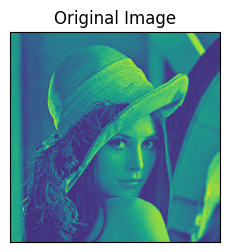

In [ ]:
plt.figure(figsize=(6,6))

plt.subplot(221), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

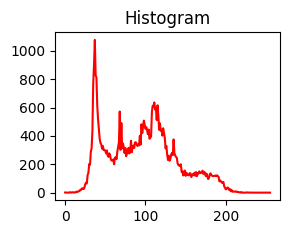

In [ ]:
plt.subplot(222), plt.plot(hist, color='r')
plt.title('Histogram')
plt.show()

In [ ]:
plt.subplot(221), plt.imshow(img)

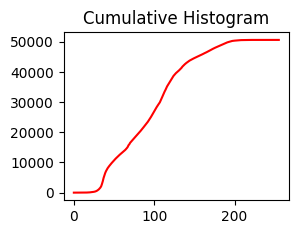

In [ ]:
plt.subplot(222), plt.plot(cdf, color='r')
plt.title('Cumulative Histogram')
plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7dd0cbd4b940>)

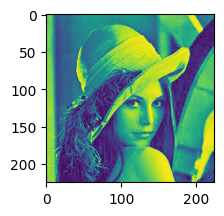

In [ ]:
plt.subplot(223), plt.imshow(imgnormalized)

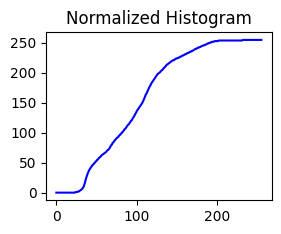

In [ ]:
plt.subplot(224), plt.plot(normalized, color='b')
plt.title('Normalized Histogram')
plt.show()

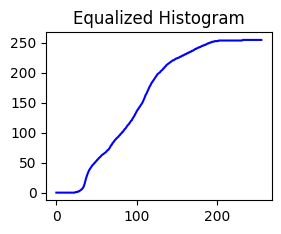

In [ ]:
plt.subplot(224), plt.plot(normalized, color='b')
plt.title('Equalized Histogram')
plt.show()

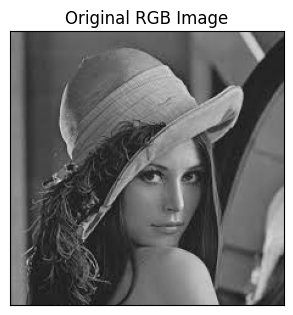

In [ ]:
def rgb_to_grayscale_formula(rgb_img):
    # Apply the formula: gray_img = 0.299 R + 0.587 G + 0.114 B
    R = rgb_img[:,2]
    G = rgb_img[:,1]
    B = rgb_img[:,0]
    gray_img = 0.299 * R + 0.587 * G + 0.114 * B
    gray_img = gray_img.astype(np.uint8)
    return gray_img

gray_img_formula = rgb_to_grayscale_formula(img)
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original RGB Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
gray_img_cv2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(132), plt.imshow(gray_img_formula, cmap='gray')
plt.title('Grayscale using Formula'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(gray_img_cv2, cmap='gray')
plt.title('Grayscale using cv2.cvtColor()'), plt.xticks([]), plt.yticks([])

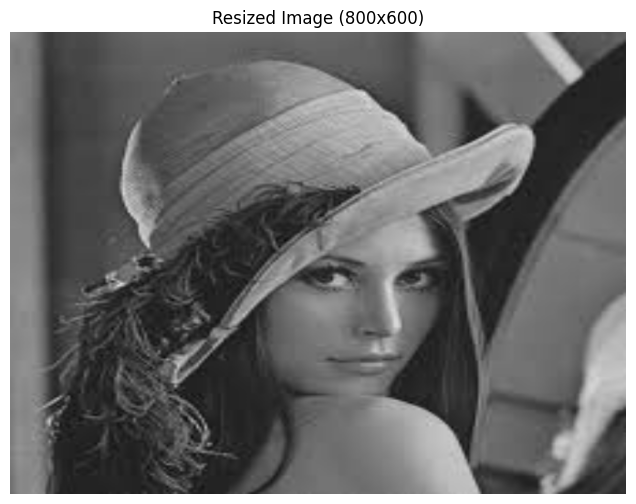

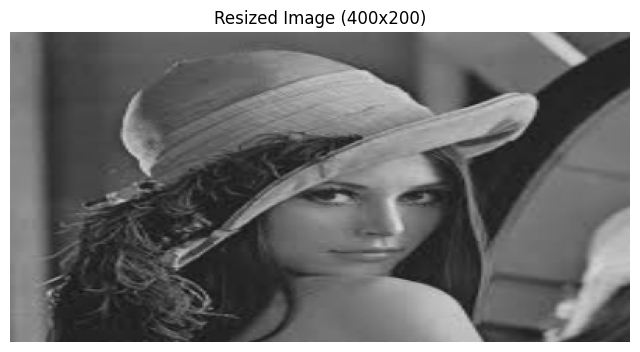

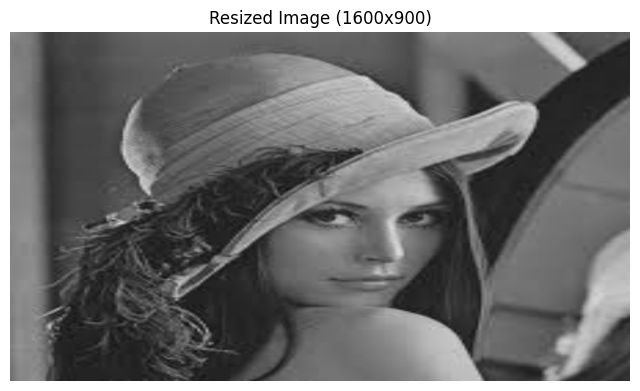

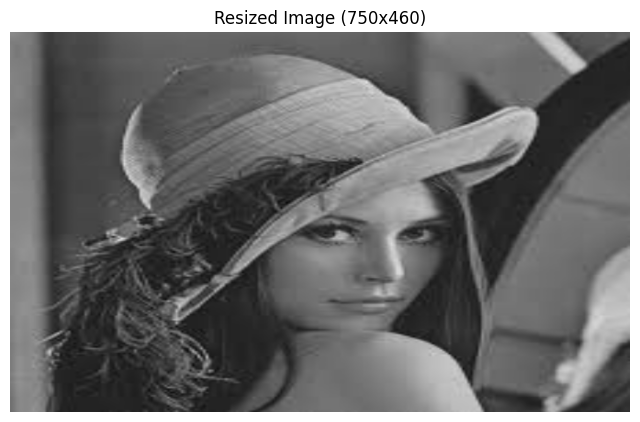

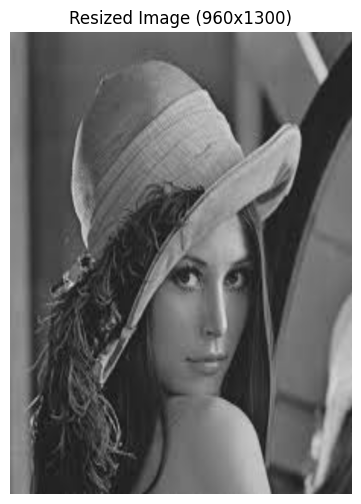

In [ ]:
dimensions = [(800, 600), (400, 200), (1600, 900), (750, 460), (960, 1300)]

for width, height in dimensions:
  currentheight, currentwidth = img.shape[:2]
  x = width / currentwidth
  y = height / currentheight
  resized = cv2.resize(img, (width, height), interpolation=cv2.INTER_LINEAR)
  plt.figure(figsize=(6, 6))
  plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
  plt.title(f'Resized Image ({width}x{height})')
  plt.show()

(Text(0.5, 1.0, 'Image with Convolution'), ([], []), ([], []))

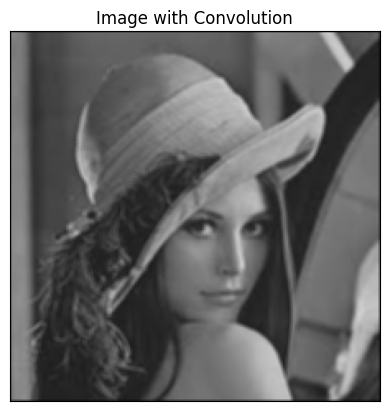

In [ ]:
boxblurkernel = np.ones((3, 3), np.float32) / 9.0
imageheight, imagewidth = img.shape[:2]
kernelheight, kernelwidth = boxblurkernel.shape

dummyimage = np.zeros((imageheight, imagewidth, 3), dtype=np.uint8)

for i in range(imageheight):
    for j in range(imagewidth):
        for c in range(3):
            sum = 0.0
            for m in range(kernelheight):
                for n in range(kernelwidth):

                    x = i + m - kernelheight // 2
                    y = j + n - kernelwidth // 2
                    if x >= 0 and x < imageheight and y >= 0 and y < imagewidth:
                        sum += img[x, y] * boxblurkernel[m, n]
            dummyimage[i, j, c] = int(sum)


plt.imshow(dummyimage)
plt.title('Image with Convolution'), plt.xticks([]), plt.yticks([])

In [ ]:
image = cv2.imread('/content/images.jpg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('template.jpg', cv2.IMREAD_GRAYSCALE)

imageheight, imagewidth = image.shape
templateheight, templatewidth = template.shape
dummy = np.zeros((imageheight, imagewidth), dtype=np.uint8)
maxcorrelation = 0
maxcorrpos = (0, 0)

normalized = image / 255.0
normalizedtemplate = template / 255.0

for i in range(imageheight - templateheight + 1):
    for j in range(imagewidth - templatewidth + 1):
        region = normalized[i:i+templateheight, j:j+templatewidth]
        correlation = np.sum(region * normalizedtemplate)
        if correlation > maxcorrelation:
            maxcorrelation = correlation
            maxcorrpos = (i, j)

matched = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.rectangle(matched, (maxcorrpos[1], maxcorrpos[0]), (maxcorrpos[1] + templatewidth, maxcorrpos[0] + templateheight), (0, 255, 0), 2)

plt.imshow(template)
plt.title('Template'), plt.xticks([]), plt.yticks([])

plt.imshow(matched)
plt.title('Matched Region'), plt.xticks([]), plt.yticks([])